# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold
* KNN

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [2]:
np.random.seed(seed=25)

### Load Data from 'titanic_clean.csv'

In [3]:
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [4]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df=df_OneHot.copy()

### Create Independent and Dependent Variables

In [6]:
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df['Survived']

### Train Test n Split the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


In [9]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
ytrain.head()

707    0
246    0
624    1
96     1
576    0
Name: Survived, dtype: int64

In [11]:
type(ytrain)
ytrain.shape

(623,)

# 1. Logistic Regression

### Creating Model & Training

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression(random_state=25)

In [14]:
lr_model.fit(xtrain, ytrain)

/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation 

In [15]:
pred = lr_model.predict(xtest)

In [16]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0])

Predicting prabability of **0** and **1**

In [17]:
pred_prb = lr_model.predict_proba(xtest)

In [18]:
pred_prb[0:9,0:9]

array([[0.95460202, 0.04539798],
       [0.92861449, 0.07138551],
       [0.90355787, 0.09644213],
       [0.92861449, 0.07138551],
       [0.92861449, 0.07138551],
       [0.26499671, 0.73500329],
       [0.92861449, 0.07138551],
       [0.17722864, 0.82277136],
       [0.95460202, 0.04539798]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [19]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

### Comparison of Predicted and Actual

In [20]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045398,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.096442,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071386,0


### Confusion Matrix Play ground

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(ytest, pred)

array([[151,  18],
       [ 29,  70]])

In [24]:
confusion_matrix(ytest, pred).ravel()

array([151,  18,  29,  70])

In [25]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,18,151


### Accuracy

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8246268656716418


In [28]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8246268656716418


### Precision

In [29]:
from sklearn.metrics import precision_score

In [31]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7954545454545454
Precision for 0: 0.8388888888888889


In [32]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7954545454545454


### Recall

In [33]:
from sklearn.metrics import recall_score

In [34]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.893491124260355


In [35]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


### F1 Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.748663101604278
F1 Score for 0: 0.8653295128939829


In [38]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.748663101604278


### Class Distribution in Training Data

In [39]:
ytrain.value_counts()

0    380
1    243
Name: Survived, dtype: int64

### Classification Report

In [40]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.80      0.71      0.75        99

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [43]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             18                151
Accuracy: 82.463
Precision : 79.545
Recall: 70.707
F1 Score : 74.866
TPR: 70.707  FPR: 10.651


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [44]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [45]:
tpr, fpr

(0.7070707070707071, 0.10650887573964497)

In [46]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, 0.10650887573964496)

Defining function to plot ROC AUC Curve

In [47]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [49]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [50]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.8282828282828283

Plotting AUC ROC Curve

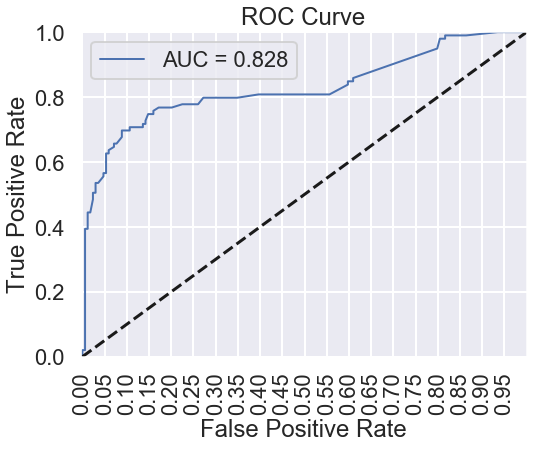

In [51]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [52]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = lr_poly.predict(X_tr_poly),lr_poly.predict(X_tst_poly)
   
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

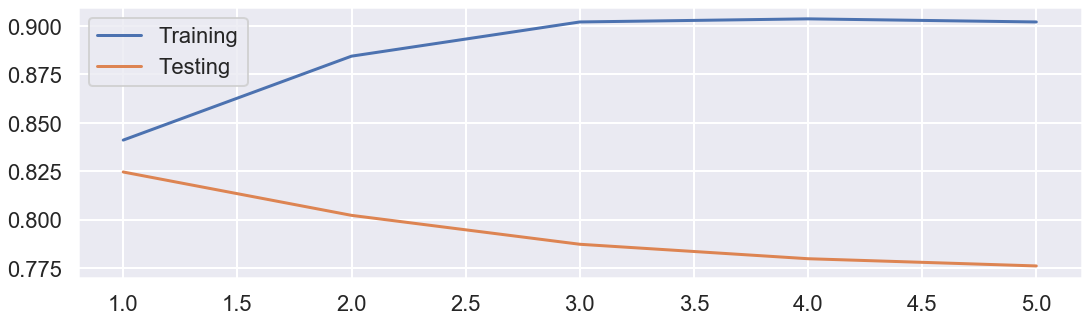

In [53]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# 2. K Nearest Neighbors (KNN)

### Create Independent and Dependent Variables

In [54]:
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df['Survived']

### Train test and split the dataset

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


For KNN, we need to stadardize data first

In [57]:
from sklearn.preprocessing import StandardScaler 

In [58]:
scaler = StandardScaler()  
scaler.fit(xtrain)
X_train_=scaler.transform(xtrain)
X_test_=scaler.transform(xtest)
X_train=pd.DataFrame(data=X_train_, columns=xtrain.columns)
X_test=pd.DataFrame(data=X_test_, columns=xtest.columns)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
clf_knn = KNeighborsClassifier(n_neighbors = 10)

In [61]:
clf_knn.fit(X_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [62]:
knn_pred=clf_knn.predict(X_test)
knn_pred_prb=clf_knn.predict_proba(X_test)[:,1]

In [63]:
accuracy_train=accuracy_score(ytrain,clf_knn.predict(X_train))
print("Accuracy Train: {}".format(accuracy_train))

Accuracy Train: 0.8523274478330658


In [64]:
accuracy_knn = accuracy_score(ytest,knn_pred)
print("Accuracy : {}".format(accuracy_knn))

Accuracy : 0.8246268656716418


In [65]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       169
           1       0.82      0.67      0.74        99

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [66]:
fpr,tpr,threshold=roc_curve(ytest,knn_pred_prb)

In [67]:
auc_knn=roc_auc_score(ytest,knn_pred_prb)
auc_knn

0.8457055764748073

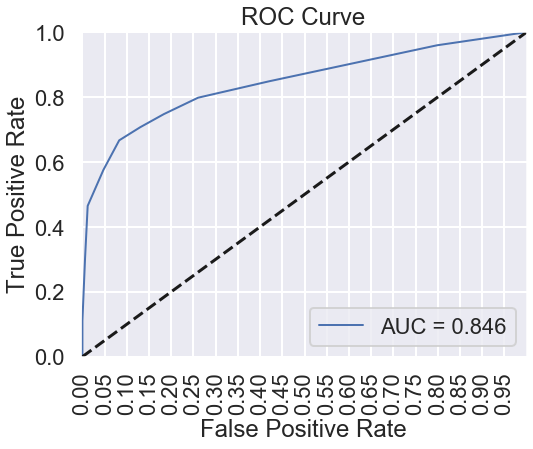

In [68]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_knn)

### Model Complexity

In [69]:
accuracy_train=[]
accuracy_test=[]
for i in range(1,26):
    cnn_model = KNeighborsClassifier(n_neighbors=i)
    cnn_model.fit(X_train,ytrain)
   
    knn_pred=cnn_model.predict(X_test)
    knn_pred_prb=cnn_model.predict_proba(X_test)[:,1]
   
    accuracy_train.append(accuracy_score(ytrain,cnn_model.predict(X_train)))
    accuracy_test.append(accuracy_score(ytest,knn_pred))



Text(0, 0.5, 'Accuracy Score')

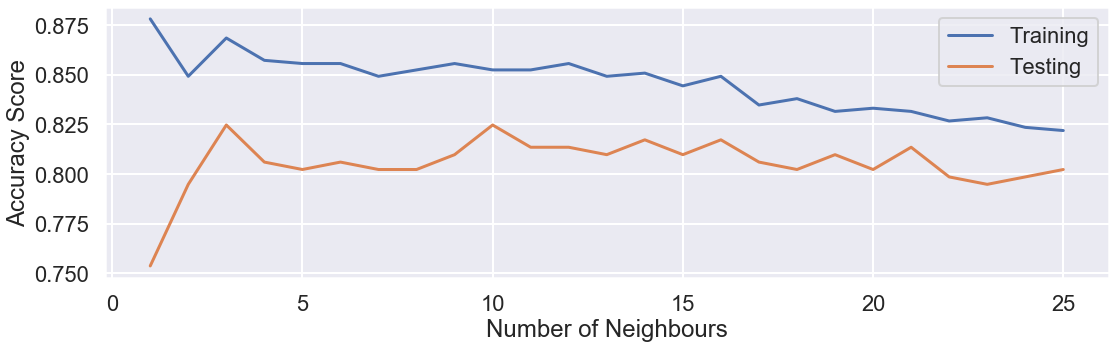

In [70]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,26)), y=accuracy_train, label='Training')

sns.lineplot(x=list(range(1,26)), y=accuracy_test, label='Testing')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy Score')

In [71]:
list(zip(accuracy_train, accuracy_test))

[(0.8780096308186196, 0.753731343283582),
 (0.8491171749598716, 0.7947761194029851),
 (0.8683788121990369, 0.8246268656716418),
 (0.8571428571428571, 0.8059701492537313),
 (0.85553772070626, 0.8022388059701493),
 (0.85553772070626, 0.8059701492537313),
 (0.8491171749598716, 0.8022388059701493),
 (0.8523274478330658, 0.8022388059701493),
 (0.85553772070626, 0.8097014925373134),
 (0.8523274478330658, 0.8246268656716418),
 (0.8523274478330658, 0.8134328358208955),
 (0.85553772070626, 0.8134328358208955),
 (0.8491171749598716, 0.8097014925373134),
 (0.8507223113964687, 0.8171641791044776),
 (0.8443017656500803, 0.8097014925373134),
 (0.8491171749598716, 0.8171641791044776),
 (0.8346709470304976, 0.8059701492537313),
 (0.8378812199036918, 0.8022388059701493),
 (0.8314606741573034, 0.8097014925373134),
 (0.8330658105939005, 0.8022388059701493),
 (0.8314606741573034, 0.8134328358208955),
 (0.826645264847512, 0.7985074626865671),
 (0.8282504012841091, 0.7947761194029851),
 (0.8234349919743178,

# 3. Submission on Kaggle

### Import test data

In [72]:
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


### Do One Hot encoding of test data

In [73]:
df_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()
df_test=df_OneHot.copy()

### Separate Passenger ID for submission

In [74]:
PassengerID=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)


### Do prediction through final model

In [75]:
pred_final=lr_model.predict(df_test)

#### Creating Data Frame for submission

In [76]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [77]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Task 10: Export the dataset into csv file

In [126]:
# Write code here
submission.to_csv('my_submission v1.0.csv',index=False)